HOUSE PRICE PREDICTOR USING LINEAR REGRESSION

LOAD DATASET

In [9]:
import pandas as pd
data=pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\Dristi Database\projects\EstimateHousePrice\BostonHousing.csv")
data.head()
print(data.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


CORRELATION MATRIX

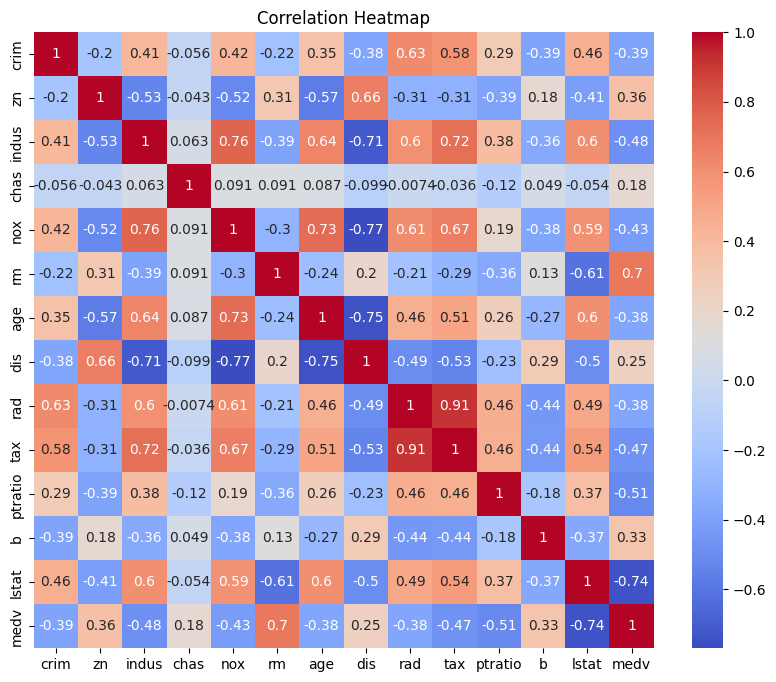

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

TRAINING AND TESTING THE MODEL

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

data.isnull().sum()
data['rm'] = data['rm'].fillna(data['rm'].mean())
X = data[['rm','lstat','ptratio']]  
y = data['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

print("R² Score:", r2_score(y_test, prediction))
print("MSE:", mean_squared_error(y_test, prediction))



R² Score: 0.6298371104787273
MSE: 27.1454450741516


VISUALIZING PREDICTIONS


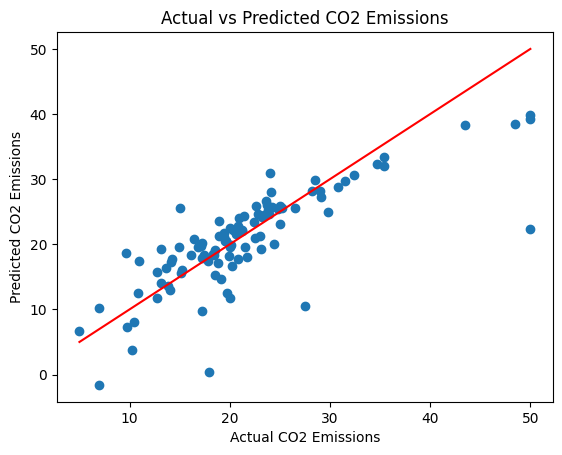

In [25]:
import matplotlib.pyplot as plt

plt.scatter(y_test, prediction)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect prediction line
plt.show()
